Cause of the murder 


In [3]:
import pandas as pd 

data = pd.read_excel('honour killing data.xlsx')

# print(data.head())

print(data.columns.tolist())

data.columns = data.columns.str.strip()






['ID', 'Date Published', 'News Source', 'Title ', 'Article Link ', 'Victim(s) Gender', 'Victim(s) Age ', 'Relationship to Perptrator', 'Cause, Motive ', 'Region ', 'Narrative Summary ', 'Framing ', 'Method of killing ', 'Additional notes ']


In [ ]:
import spacy 
from collections import Counter

from spacy.matcher import PhraseMatcher

nlp = spacy.load("en_core_web_sm")

# keywords that can appear in different forms (lemmatize to catch all)
flexible_keywords = ["suspicion", "accusation", "jealousy", "choice", "feud", "love", "eloped", "suspect"]

# exact phrases for PhraseMatcher
fixed_phrases = ["free will marriage", "viral video", "run away", "demanding divorce", "Tiktok", "love marriage"]

# Initialize PhraseMatcher
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
phrase_patterns = [nlp.make_doc(phrase) for phrase in fixed_phrases]
matcher.add("FIXED_PHRASES", phrase_patterns)

# Process the column
texts = data["Cause, Motive"].dropna().astype(str)
docs = list(nlp.pipe(texts))

# Counters
motive_counts = Counter()

for doc in docs:
    # PhraseMatcher for fixed terms
    matches = matcher(doc)
    for _, start, end in matches:
        span = doc[start:end]
        motive_counts[span.text.lower()] += 1

    # Lemmatized matching for flexible keywords
    for token in doc:
        lemma = token.lemma_.lower()
        if lemma in flexible_keywords and not token.is_stop and token.is_alpha:
            motive_counts[lemma] += 1

print("Top Motives:", motive_counts)

Top Motives: Counter({'suspect': 8, 'suspicion': 4, 'free will marriage': 3, 'tiktok': 2, 'choice': 2, 'viral video': 1, 'run away': 1, 'feud': 1, 'demanding divorce': 1, 'love marriage': 1, 'love': 1})


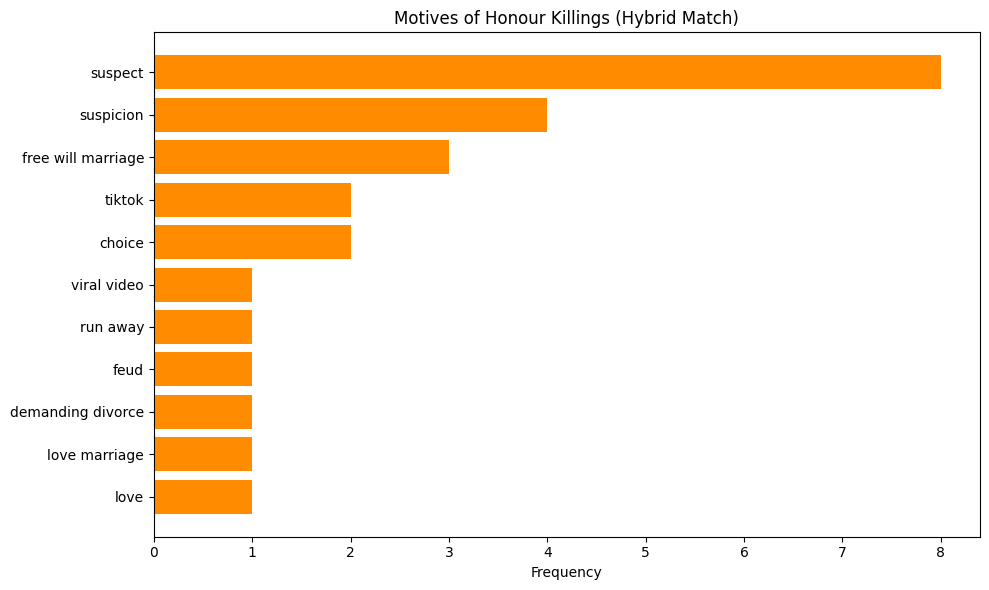

In [6]:
import matplotlib.pyplot as plt

# Plotting
motives, counts = zip(*motive_counts.most_common())
plt.figure(figsize=(10, 6))
plt.barh(motives, counts, color="darkorange")
plt.xlabel("Frequency")
plt.title("Motives of Honour Killings (Hybrid Match)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()